# **Diabetes prediction in women**
In this technical project we are using a data set to predict the diabetes in women based on their different health conditions and pregnancies.Three hypotheses is used in this project

# **GOALS**

1)Diabetes prediction using machine learning models

2)Finding those women coming under high risk conditions

3)Diabetes prediction using ANN 

# **Installing pyspark**

pyspark is a spark library written in python to run python application using apache spark capabilities using pyspark we are able to run applications parallely on the distributed cluster.Usually pyspark are 100 times faster than traditional data processing framework.

In [ ]:
## installing pyspark
##pyspark will allow wide range of libraries implementation which can be used for machine learning and real time streaming analytics.
#pyspark is a python API for spark which help us to harness the simplicity of python.
!pip install pyspark

     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 198 kB 51.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=0e45f6731bdbf037d632c42735f269ab3aabaa946305c311e269c04b2cf52955
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


# Hadoop

 Hadoop provides large amounts of storage, processing power, and the ability to handle virtually limitless simultaneous tasks.
 spark3.1.2 version is used here for data analysis.seaborn- it is a library in python used for making statastical graphics.plotly Python library is an interactive, open-source plotting library.
 Imageio is a Python library that provides an easy interface to read and write a wide range of image data.
 Folium is a powerful Python library use to create several types of Leaflet maps


In [ ]:
%%capture
!apt install libkrb5-dev
## Let's install Apache Spark on Colab

!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark

import os

os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
import os
os.environ['SPARK_HOME'] = "/content/spark-3.1.2-bin-hadoop3.2"
import pyspark
from pyspark.sql import SQLContext

from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

In [ ]:
#display spark
spark

In [ ]:
# Core Magellan libraries, for string similarity
!pip3 install py_stringsimjoin

     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 661 kB 47.7 MB/s 
  Created wheel for py-stringsimjoin: filename=py_stringsimjoin-0.3.2-cp37-cp37m-linux_x86_64.whl size=3724023 sha256=5bcb6550caaedf65c0cf8f8348635a63254fe0ece143ca3cd0c881bc1da9cff1
  Stored in directory: /root/.cache/pip/wheels/7c/0d/a4/c0a779a4d196bed8ed41ca12be09a93e158e4fc974b59f9fd5
  Created wheel for py-stringmatching: filename=py_stringmatching-0.4.2-cp37-cp37m-linux_x86_64.whl size=2055545 sha256=071b4c003e36cc82d478378e78e1a45ed96349789eb3a63cab73406476c857e2
  Stored in directory: /root/.cache/pip/wheels/7e/12/86/46f9378ae730550dd2f89cad50880e70d66cabedd90074f2d2
Successfully built py-stringsimjoin py-stringmatching


In [ ]:
#pandas are mainly used for data analysis
import pandas as pd
#import libraries
#if you install py_stringimjoin then it will automatically install the
# dependencies py_stringmatching and pandas
# Approximate string matching
import py_stringsimjoin as ssj
import py_stringmatching as sm

Lets read this csv data file.
pandas read csv file and then spark read the csv file 
then.And we can display the first 10 datas from our data set.

In [ ]:
data_df=pd.read_csv('/content/diabetes_data.csv')

In [ ]:
data_df = spark.read.csv('/content/diabetes_data.csv', header=True)

In [ ]:
##shows the first 10 datas from our data set
data_df.show(10)

+-----------+-------+-------------+-------------+-------+-----------+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|        BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+-----------+------------------------+---+-------+
|          0|    171|           80|           34|     23|43.50972593|             1.213191354| 21|      0|
|          8|     92|           93|           47|     36|21.24057571|             0.158364981| 23|      0|
|          7|    115|           47|           52|     35|41.51152348|             0.079018568| 23|      0|
|          9|    103|           78|           25|    304|29.58219193|             1.282869847| 43|      1|
|          1|     85|           59|           27|     35|42.60453585|             0.549541871| 22|      0|
|          0|     82|           92|            9|    253|19.72416021|             0.103424498| 26|      0|
|          0|    133|           47|  

In [ ]:
##show the total count of our data set
data_df.count()

15768

# **EDA**

Exploratory data analysis is one of the most popular data science techniques nowadays. People who are just beginning out in Data Science often don't understand the distinction between data analysis and exploratory data analysis. Although there isn't much of a distinction between the two, they serve different objectives.

**Importing libraries**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**loading dataset**

In [ ]:
data_df=pd.read_csv('/content/diabetes_data.csv')

**Exploring data**

In [ ]:
##Tells the shape of attributes
data_df.shape

(15768, 9)

In [ ]:
##Shows the information of dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15768 entries, 0 to 15767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               15768 non-null  int64  
 1   Glucose                   15768 non-null  int64  
 2   BloodPressure             15768 non-null  int64  
 3   SkinThickness             15768 non-null  int64  
 4   Insulin                   15768 non-null  int64  
 5   BMI                       15768 non-null  float64
 6   DiabetesPedigreeFunction  15768 non-null  float64
 7   Age                       15768 non-null  int64  
 8   Outcome                   15768 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.1 MB


**Data Type Describe**

In [ ]:
data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000
mean,3.254756,108.491882,71.117643,28.410832,135.024607,31.533168,0.402519,30.288876,0.334094
std,3.392503,32.103413,16.899902,14.734410,132.841602,9.676452,0.376125,12.091964,0.471688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,0.000000,85.000000,58.000000,15.000000,37.000000,21.348647,0.140140,22.000000,0.000000
50%,2.000000,105.000000,72.000000,30.000000,82.000000,31.799983,0.209146,24.000000,0.000000
75%,6.000000,130.000000,85.000000,41.000000,193.000000,39.135492,0.616693,35.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Null data sum**

In [ ]:
data_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Duplicate data**

In [ ]:
duplicate = data_df.duplicated()
print(duplicate.sum())
data_df[duplicate]

0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Correlation**

In [ ]:
data_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.061300,0.047802,0.050713,0.092737,0.083962,0.052041,0.157974,0.398208
Glucose,0.061300,1.000000,0.012889,0.017806,0.037548,0.029406,0.018134,0.054070,0.144720
BloodPressure,0.047802,0.012889,1.000000,0.026116,0.028235,0.027605,0.014265,0.050474,0.089558
SkinThickness,0.050713,0.017806,0.026116,1.000000,0.059279,0.039000,0.002589,0.045156,0.146355
Insulin,0.092737,0.037548,0.028235,0.059279,1.000000,0.055020,0.047311,0.076920,0.240494
BMI,0.083962,0.029406,0.027605,0.039000,0.055020,1.000000,0.033189,0.062335,0.213655
DiabetesPedigreeFunction,0.052041,0.018134,0.014265,0.002589,0.047311,0.033189,1.000000,0.056873,0.170528
Age,0.157974,0.054070,0.050474,0.045156,0.076920,0.062335,0.056873,1.000000,0.337468
Outcome,0.398208,0.144720,0.089558,0.146355,0.240494,0.213655,0.170528,0.337468,1.000000


**Normalizing and Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [ ]:
data_df['Pregnancies'] =std_scale.fit_transform(data_df[['Pregnancies']])
data_df['Glucose'] =std_scale.fit_transform(data_df[['Glucose']])
data_df['BloodPressure'] =std_scale.fit_transform(data_df[['BloodPressure']])
data_df['SkinThickness'] =std_scale.fit_transform(data_df[['SkinThickness']])
data_df['Insulin'] =std_scale.fit_transform(data_df[['Insulin']])
data_df['BMI'] =std_scale.fit_transform(data_df[['BMI']])
data_df['DiabetesPedigreeFunction'] =std_scale.fit_transform(data_df[['DiabetesPedigreeFunction']])
data_df['Age'] =std_scale.fit_transform(data_df[['Age']])
data_df['Outcome'] =std_scale.fit_transform(data_df[['Outcome']])


In [ ]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.959427,1.947148,0.525603,0.379340,-0.843321,1.237741,2.155394,-0.768210,-0.708318
1,1.398788,-0.513727,1.294863,1.261656,-0.745457,-1.063708,-0.649150,-0.602806,-0.708318
2,1.104011,0.202730,-1.427133,1.601008,-0.752985,1.031232,-0.860114,-0.602806,-0.708318
3,1.693565,-0.171074,0.407255,-0.231495,1.272047,-0.201627,2.340654,1.051238,1.411795
4,-0.664650,-0.731780,-0.717047,-0.095754,-0.752985,1.144192,0.390901,-0.685508,-0.708318


In [ ]:
## Seaborn is mainly used for making statistical graphing for the data set it can
## be import as sns
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


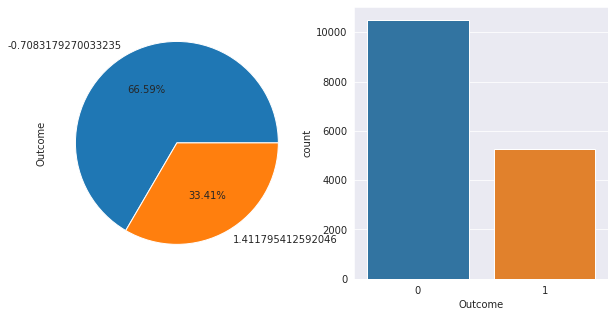

In [ ]:
## from the dataset it is clear that the diabetics prediction is done based on the
## outcome value .here we are having 0 and 1 as outcome value so we are using
## that outcome value to plot the graph.
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
## we are using bar and pie diagram for our first output prediction
## from the figure it is clearly known that 66.59% is not having diabetics and
## 33.41% women are suffering from diabetes.
data_df['Outcome'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'Outcome',data=data )
plt.show()

# **Reading the data in SQL**

Structured Query Language which is used for interacting with RDBMS and which ised to perform C.R.U.D operations and to define tables and structures

Required libraries are installed here.
Pandas is a software library written for the python programming language for our data manipulation and analysis.Where as numpy is used for supporting large multi dimensional arrays and matrices,and matplot is used  for plotting graphs.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



In [ ]:
import sqlite3

In [ ]:
data = pd.read_csv('/content/diabetes_data.csv')

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...
15763,10,101,76,48,180,32.900000,0.171000,63,0
15764,2,122,70,27,0,36.800000,0.340000,27,0
15765,5,121,72,23,112,26.200000,0.245000,30,0
15766,1,126,60,0,0,30.100000,0.349000,47,1


In [ ]:
conn = sqlite3.connect('local.db')

data.to_sql("diabetes_data", conn, if_exists="replace", index=False)

pd.read_sql_query('select * from diabetes_data', conn)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...
15763,10,101,76,48,180,32.900000,0.171000,63,0
15764,2,122,70,27,0,36.800000,0.340000,27,0
15765,5,121,72,23,112,26.200000,0.245000,30,0
15766,1,126,60,0,0,30.100000,0.349000,47,1


# **Cleaning the dataset for solving our hypothesis**

To extract useful values from the data we really need the raw data.Data cleaning is essential part of data science.Data cleaning is actually a process of removing incorrect ,corrupted,duplicate or incomplete data from our data set.

In [ ]:
## Display data
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...
15763,10,101,76,48,180,32.900000,0.171000,63,0
15764,2,122,70,27,0,36.800000,0.340000,27,0
15765,5,121,72,23,112,26.200000,0.245000,30,0
15766,1,126,60,0,0,30.100000,0.349000,47,1


In [ ]:
## Removing missing data from the dataset
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
15763,False,False,False,False,False,False,False,False,False
15764,False,False,False,False,False,False,False,False,False
15765,False,False,False,False,False,False,False,False,False
15766,False,False,False,False,False,False,False,False,False


In [ ]:
## founded the count of null data set
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Displayed the count of data after cleaning
data.count()

Pregnancies                 15768
Glucose                     15768
BloodPressure               15768
SkinThickness               15768
Insulin                     15768
BMI                         15768
DiabetesPedigreeFunction    15768
Age                         15768
Outcome                     15768
dtype: int64

Here we actually cannot find duplicate data some times different persons may have same values.

# **Goal -1**
By building different machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not.For that first we need to Removing all zero values from the dataset and making it more clean and clear.Detecting diabetes prediction in those women whose age is above 25 years.


In [ ]:
data_df = data

In [ ]:
data_clean = pd.read_sql_query('select * from diabetes_data where Pregnancies is not 0 and Glucose is not 0 and BloodPressure is not 0 and SkinThickness is not 0 and Insulin is not 0 and BMI is not 0 and DiabetesPedigreeFunction is not 0 and Age is not 0',conn)

In [ ]:
data_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8,92,93,47,36,21.240576,0.158365,23,0
1,7,115,47,52,35,41.511523,0.079019,23,0
2,9,103,78,25,304,29.582192,1.282870,43,1
3,1,85,59,27,35,42.604536,0.549542,22,0
4,8,80,95,33,24,26.624929,0.443947,53,1
...,...,...,...,...,...,...,...,...,...
10954,1,121,78,39,74,39.000000,0.261000,28,0
10955,1,128,88,39,110,36.500000,1.057000,37,1
10956,2,88,58,26,16,28.400000,0.766000,22,0
10957,10,101,76,48,180,32.900000,0.171000,63,0


In [ ]:
new_data = data_clean

In [ ]:
new_data.count()

Pregnancies                 10959
Glucose                     10959
BloodPressure               10959
SkinThickness               10959
Insulin                     10959
BMI                         10959
DiabetesPedigreeFunction    10959
Age                         10959
Outcome                     10959
dtype: int64

In [ ]:
new_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
new_df = pd.read_sql_query('select * from diabetes_data where Pregnancies >= 1 and Glucose >=80 and BloodPressure is not 0 and SkinThickness is not 0 and Insulin is not 0 and BMI is not 0 and DiabetesPedigreeFunction is not 0 and Age  >= 25',conn)
                            

In [ ]:
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,103,78,25,304,29.582192,1.282870,43,1
1,8,80,95,33,24,26.624929,0.443947,53,1
2,5,114,101,43,70,36.495320,0.079190,38,1
3,7,110,82,16,44,36.089293,0.281276,25,0
4,3,106,64,25,51,29.044573,0.589188,42,1
...,...,...,...,...,...,...,...,...,...
4521,3,187,70,22,200,36.400000,0.408000,36,1
4522,1,121,78,39,74,39.000000,0.261000,28,0
4523,1,128,88,39,110,36.500000,1.057000,37,1
4524,10,101,76,48,180,32.900000,0.171000,63,0


In [ ]:
new_df.shape

(4526, 9)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526 entries, 0 to 4525
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               4526 non-null   int64  
 1   Glucose                   4526 non-null   int64  
 2   BloodPressure             4526 non-null   int64  
 3   SkinThickness             4526 non-null   int64  
 4   Insulin                   4526 non-null   int64  
 5   BMI                       4526 non-null   float64
 6   DiabetesPedigreeFunction  4526 non-null   float64
 7   Age                       4526 non-null   int64  
 8   Outcome                   4526 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 318.4 KB


In [ ]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,4526.0,4.715201,3.173227,1.000000,2.000000,4.000000,7.000000,17.000000
Glucose,4526.0,119.580645,26.950120,80.000000,99.000000,113.000000,138.000000,197.000000
BloodPressure,4526.0,72.249669,15.587613,24.000000,61.000000,73.000000,85.000000,117.000000
SkinThickness,4526.0,30.134556,14.631979,7.000000,16.000000,30.000000,42.000000,92.000000
Insulin,4526.0,156.842024,142.356810,14.000000,49.000000,96.000000,214.000000,846.000000
BMI,4526.0,32.675874,9.182153,18.203229,24.388492,32.800611,39.202179,56.034628
DiabetesPedigreeFunction,4526.0,0.443556,0.408468,0.078056,0.141994,0.225609,0.691363,2.329000
Age,4526.0,40.960230,11.863783,25.000000,31.000000,42.000000,47.000000,81.000000
Outcome,4526.0,0.586390,0.492535,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
## Seaborn is mainly used for making statistical graphing for the data set it can
## be import as sns
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


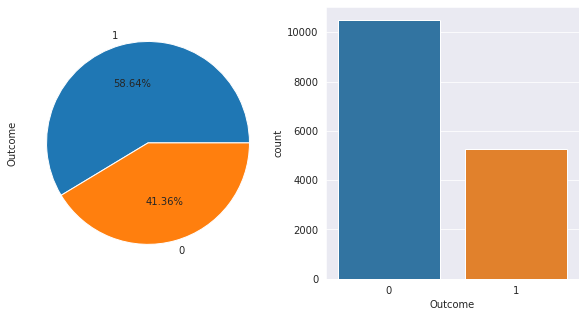

In [ ]:
## from the dataset it is clear that the diabetics prediction is done based on the
## outcome value .here we are having 0 and 1 as outcome value so we are using
## that outcome value to plot the graph.
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
## we are using bar and pie diagram for our first output prediction
## from the figure it is clearly known that 58.64% is not having diabetics and
## 41.36% women are suffering from diabetes.
new_df['Outcome'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'Outcome',data=data )
plt.show()

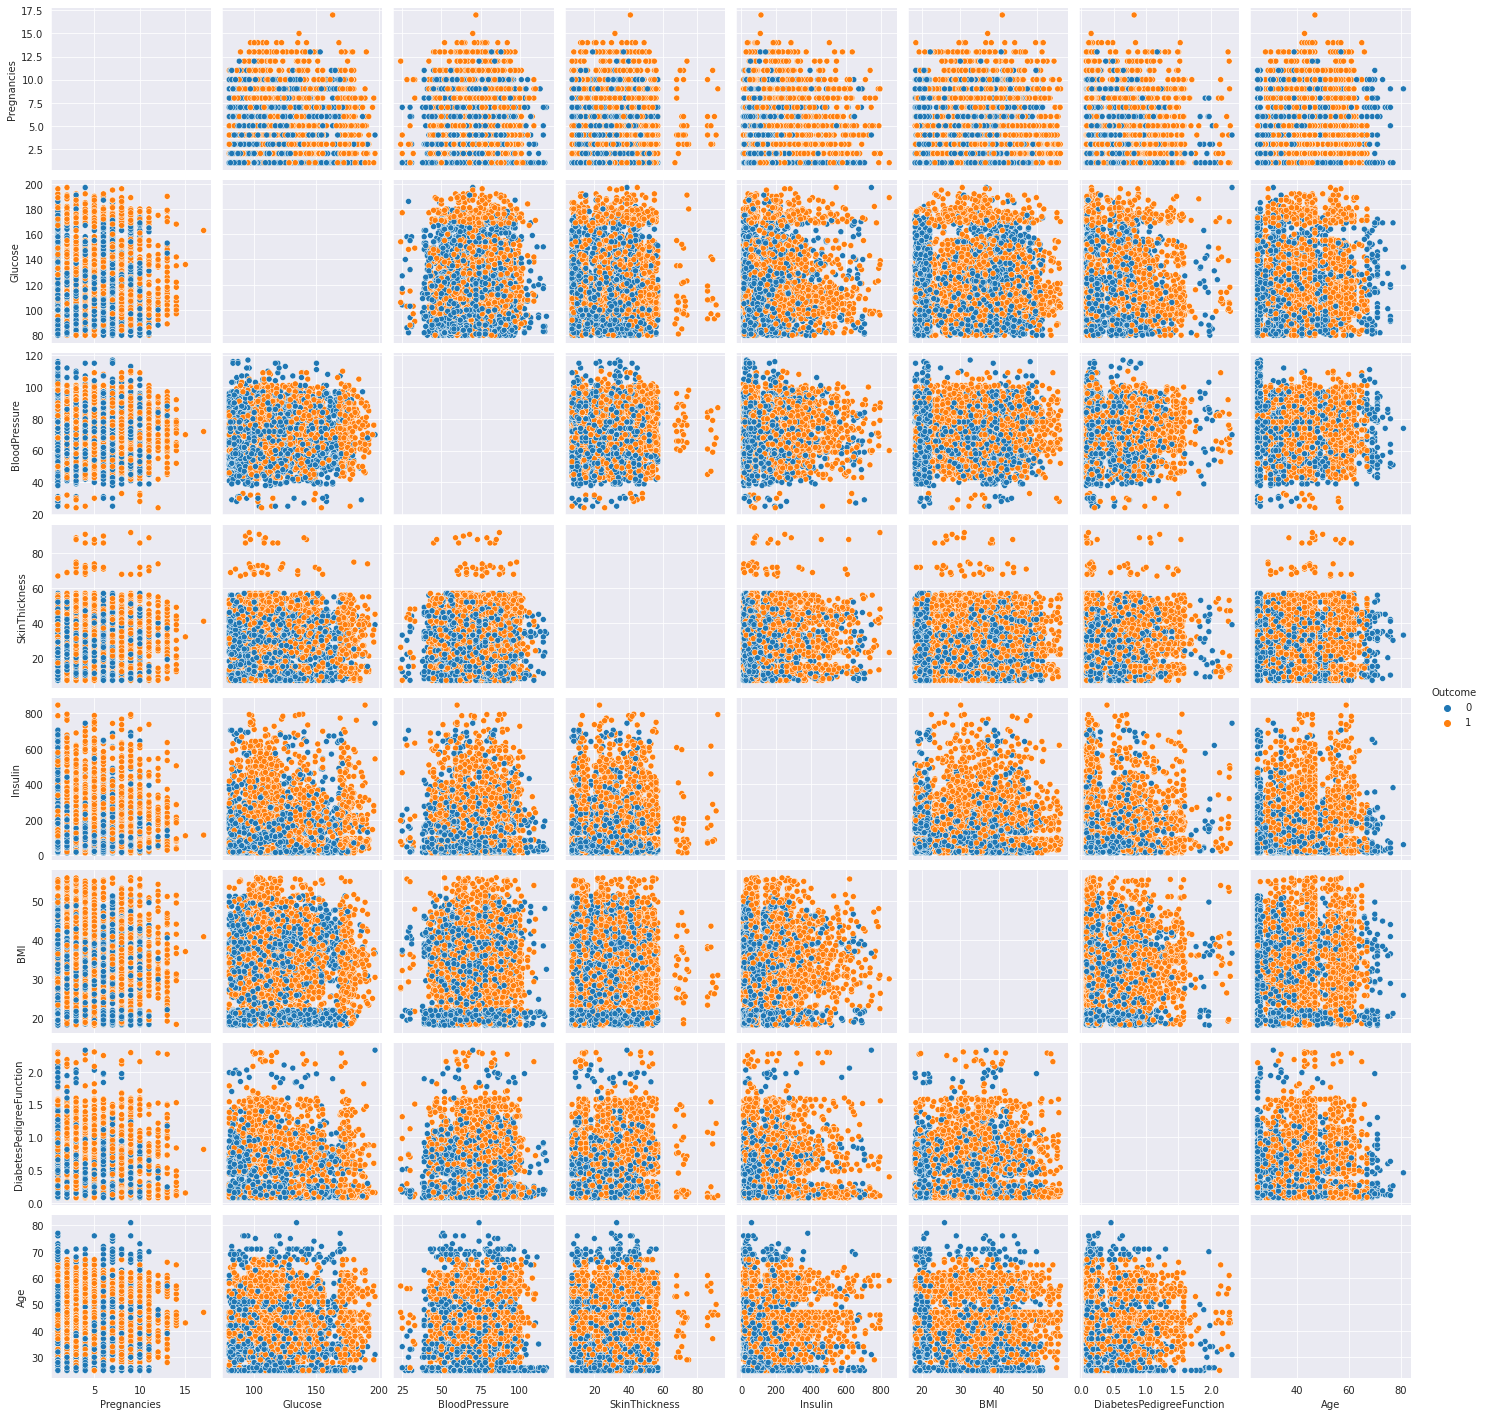

In [ ]:
sns.pairplot(new_df, hue='Outcome',diag_kind = 'line')

Displayed the graphical representation of total diabetics and non diabetic women from the dataset.

In [ ]:
nd_df = pd.read_sql_query('select * from diabetes_data where Outcome is 1',conn)

In [ ]:
nd_df.shape

(5268, 9)

In [ ]:
nd_df.count

<bound method DataFrame.count of       Pregnancies  Glucose  ...  Age  Outcome
0               9      103  ...   43        1
1               8       80  ...   53        1
2               5      114  ...   38        1
3               3      109  ...   21        1
4               3      106  ...   42        1
...           ...      ...  ...  ...      ...
5263            1      128  ...   37        1
5264            0      123  ...   52        1
5265            6      190  ...   66        1
5266            9      170  ...   43        1
5267            1      126  ...   47        1

[5268 rows x 9 columns]>

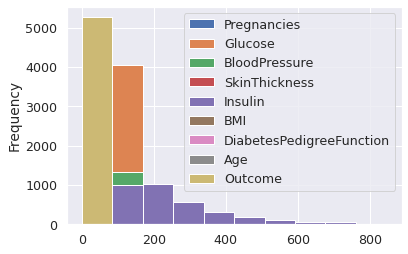

In [ ]:
nd_df.plot(kind='hist')

# **Visualizations**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


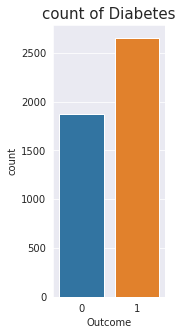

In [ ]:
plt.figure(figsize=(2,5))
sns.countplot(new_df["Outcome"])
plt.title("count of Diabetes", size=15)
plt.show()

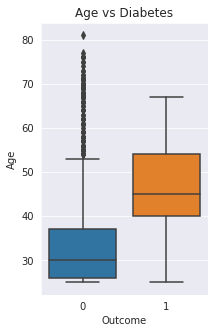

In [ ]:
plt.figure(figsize=(3,5))
sns.boxplot(x=new_df["Outcome"], y=new_df["Age"])
plt.title("Age vs Diabetes")
plt.show()

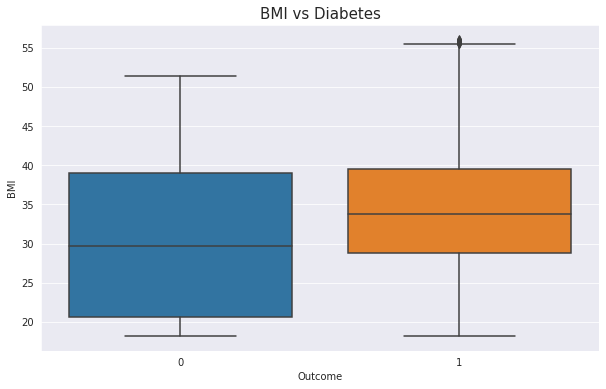

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=new_df["Outcome"], y=new_df["BMI"])
plt.title("BMI vs Diabetes", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


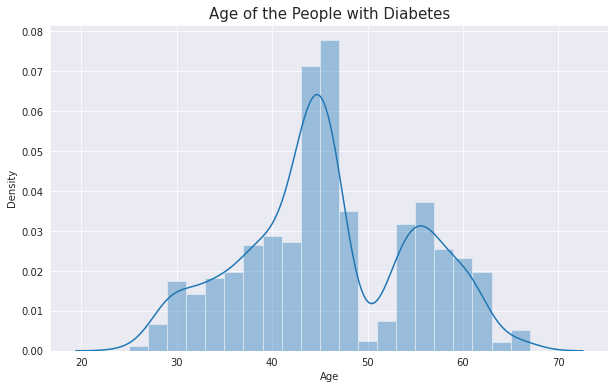

In [ ]:
people_with_diabetes = new_df[new_df["Outcome"]==1]

plt.figure(figsize=(10,6))
sns.distplot(people_with_diabetes["Age"])
plt.title("Age of the People with Diabetes", size=15)
plt.show()

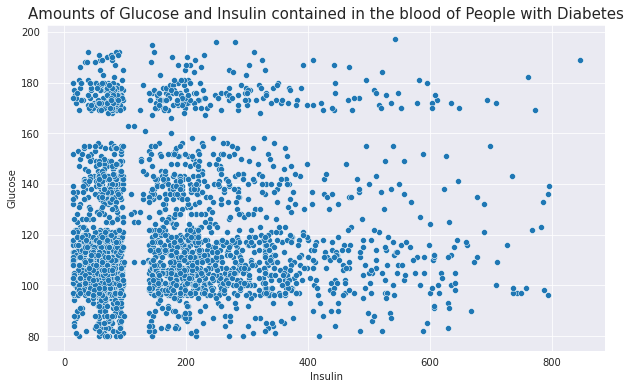

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=people_with_diabetes["Insulin"], y=people_with_diabetes["Glucose"])
plt.title("Amounts of Glucose and Insulin contained in the blood of People with Diabetes", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


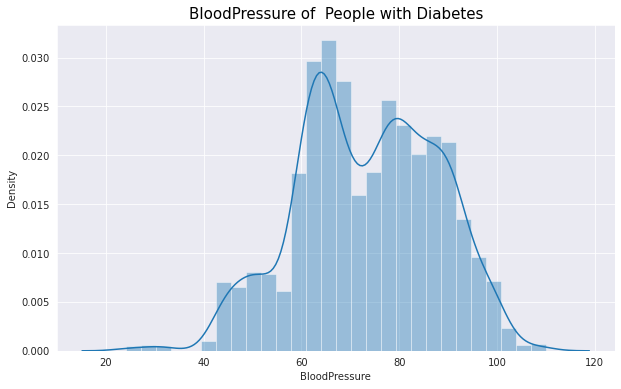

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(people_with_diabetes["BloodPressure"])
plt.title("BloodPressure of  People with Diabetes", size=15,color='black')
plt.show()

# **Implementing the classifiers and detecting the diabetics and comparing accuracy**

SVM-is a machine learning algorithm is used for regression and classification.Naive bayes classifier is a supervised machine learning algorithm used for classification and prediction.Randomforest classifier is supervised machine learning algorithm used for classification and prediction,where asa XGB classifier is used for regresssion and classification of large  data set.
Hera we are using these classifiers and by using this classifiers we are finding the accuracy.

In [ ]:
##helps in plotting figures in python
import matplotlib.pyplot as plt
#To show warning messages
import warnings
warnings.filterwarnings("ignore")

#used to impute / replace the numerical or categorical missing data related to
# one or more features with appropriate values 
from sklearn.impute import SimpleImputer

#rain_test_split is a function in Sklearn model selection for splitting data
#arrays into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split

#keep data between a mean value between 0 and 1
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
## Used to solve scientific and mathematical problems
from scipy import stats

## importing different classifiers for data analysis
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [ ]:
X = new_df.drop("Outcome", axis=1)
y = new_df["Outcome"]

display(X.head())
display(pd.DataFrame(y, columns=["Outcome"]).head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,9,103,78,25,304,29.582192,1.282870,43
1,8,80,95,33,24,26.624929,0.443947,53
2,5,114,101,43,70,36.495320,0.079190,38
3,7,110,82,16,44,36.089293,0.281276,25
4,3,106,64,25,51,29.044573,0.589188,42


,Outcome
0,1
1,1
2,1
3,0
4,1


Seperating data for test and train is important for evaluvating models

 **Train and test the model**

In [ ]:
##random splitting of data for test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [ ]:
#import the svm model
from sklearn import svm
#create a svm classifier
clf = svm.SVC(kernel='linear')
#train model
clf.fit(X_train,y_train)
#prediction
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print('Accuarcy:',metrics.accuracy_score(y_test,y_pred))


Accuarcy: 0.8181148748159057


In [ ]:
models = pd.DataFrame(columns=["Model","Accuracy Score"])

In [ ]:
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
score = accuracy_score(predictions, y_test)
print(f"Accuracy Score of XGBClassifier: {score}")

new_row = {"Model": "XGBClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score of XGBClassifier: 0.9329896907216495


In [ ]:
new_row = {"Model": "SVC", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions = GNB.predict(X_test)
score = accuracy_score(predictions, y_test)
print(f"Accuracy Score of GaussianNB: {score}")

new_row = {"Model": "GaussianNB", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score of GaussianNB: 0.8159057437407953


In [ ]:
random_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
score = accuracy_score(predictions, y_test)
print(f"Accuracy Score of RandomForestClassifier: {score}")

new_row = {"Model": "RandomForestClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score of RandomForestClassifier: 0.9241531664212077


In [ ]:
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
predictions = BNB.predict(X_test)
score = accuracy_score(predictions, y_test)
print(f"Accuracy Score of BernoulliNB: {score}")

new_row = {"Model": "BernoulliNB", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score of BernoulliNB: 0.5662739322533137


**comparison of machine learning models**

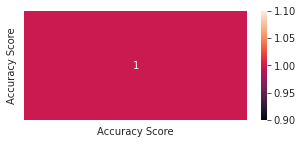

In [ ]:
import seaborn as sns
corr_ds = models.corr()
top_corr = corr_ds.index
plt.figure(figsize=(5,2))

g = sns.heatmap(models[top_corr].corr(), annot = True)

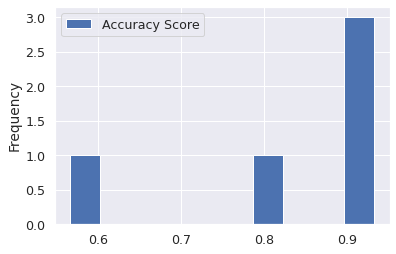

In [ ]:
models.plot(kind='hist')

In [ ]:
accuracy=models.sort_values(by="Accuracy Score", ascending=False)

In [ ]:
accuracy

,Model,Accuracy Score
0,XGBClassifier,0.932990
1,SVC,0.932990
3,RandomForestClassifier,0.924153
2,GaussianNB,0.815906
4,BernoulliNB,0.566274


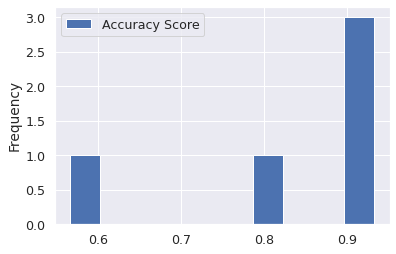

In [ ]:
accuracy.plot(kind='hist')

In [ ]:

# importing the required module
import matplotlib.pyplot as plt
 


# x axis values
x = ['XGB','SVC','RFClassifier','GaussNB','BernoulliNB'	]
# corresponding y axis values
y = [0.932990,0.932990,0.924153,0.815906,0.566274]




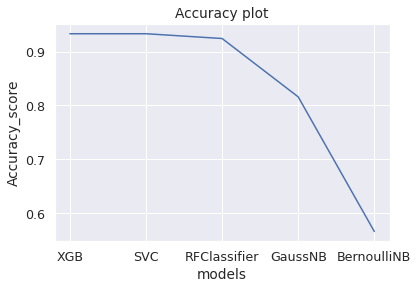

In [ ]:
 # x-axis label
plt.xlabel('models')
# frequency label
plt.ylabel('Accuracy_score')
# plot title
plt.title('Accuracy plot')
plt.plot(x,y)

# **GOAL-2**
By using ANN diabetic prediction is done for the whole dataset

# **Implementation of ANN**

Importing required libraries

In [ ]:
import keras
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [ ]:
!pip install skompiler

     |████████████████████████████████| 45 kB 1.2 MB/s 
  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54286 sha256=15a69b015da128104c038e81a2b3eb1874a983955d24fffb1cb100a5e6f27769
  Stored in directory: /root/.cache/pip/wheels/47/1c/59/b80a730f4afd2144bad854df4b167b812486c9d4c1bd4cf4c5
Successfully built skompiler


In [ ]:
# Importing the libraries necessary for the exercise.
import warnings

from skompiler import skompile
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

**loading data**

In [ ]:
## loading data in csv
data = pd.read_csv('/content/diabetes_data.csv')
data.info()
data.head()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15768 entries, 0 to 15767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               15768 non-null  int64  
 1   Glucose                   15768 non-null  int64  
 2   BloodPressure             15768 non-null  int64  
 3   SkinThickness             15768 non-null  int64  
 4   Insulin                   15768 non-null  int64  
 5   BMI                       15768 non-null  float64
 6   DiabetesPedigreeFunction  15768 non-null  float64
 7   Age                       15768 non-null  int64  
 8   Outcome                   15768 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.1 MB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,15768.0,3.254756,3.392503,0.000,0.000000,2.000000,6.000000,17.00
Glucose,15768.0,108.491882,32.103413,0.000,85.000000,105.000000,130.000000,199.00
BloodPressure,15768.0,71.117643,16.899902,0.000,58.000000,72.000000,85.000000,122.00
SkinThickness,15768.0,28.410832,14.734410,0.000,15.000000,30.000000,41.000000,99.00
Insulin,15768.0,135.024607,132.841602,0.000,37.000000,82.000000,193.000000,846.00
BMI,15768.0,31.533168,9.676452,0.000,21.348647,31.799983,39.135492,67.10
DiabetesPedigreeFunction,15768.0,0.402519,0.376125,0.078,0.140140,0.209146,0.616693,2.42
Age,15768.0,30.288876,12.091964,21.000,22.000000,24.000000,35.000000,81.00
Outcome,15768.0,0.334094,0.471688,0.000,0.000000,0.000000,1.000000,1.00


**Configure neural network**

Confugiration of neural network in three steps first create an input layer then create hiddenlayers after that an output layer.
Activation function should introduce to the hidden layer 

In [ ]:
model = Sequential()
#input layer is created
model.add(Dense(12, input_dim=8, activation='relu'))
## two output layer is created - hidden layer
# The activation function used here is relu
model.add(Dense(8, activation='relu'))
#Creating output layer for our ANN network
model.add(Dense(1, activation='sigmoid'))
##The sigmoid function is mainly used in binary classification

**Compiling the network**

Optimizer-here optimizer is used to perform gradient descent.There are various optimizer avilable like RSMprop ,adam etc.. but i feel adam can be used in any neural network for smooth operation.Loss shows which cross entropy cabn be used either binary or categorical here our otcome data is in binary and all datas are avilable in binary so we do'nt need to use categorical data.
Metrics is used to identify which performance metrics we can use here i want to find the accuracy.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


**Visualizing our ANN network**

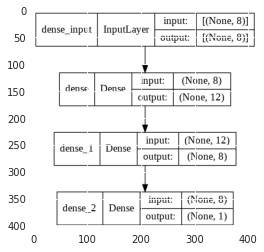

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

import matplotlib.image as img
im = img.imread('model_plot.png')
plt.imshow(im)

**Training neural network**

Splitting data for training and testing

In [ ]:
# 8 is given because it has 8 independent variables in the dataset
inputs = data.values[:,0:8]
labels = data.values[:,8].reshape((-1, 1))
sampleSize = inputs.shape[0]
##1/3 rd of data is used for testing and 2/3rd of data is used for training

In [ ]:
history= model.fit(inputs, labels, validation_split=0.33,epochs=150, batch_size=10, verbose=0)

**plotting**

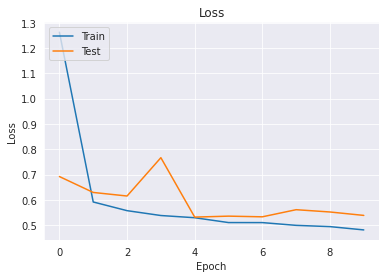

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

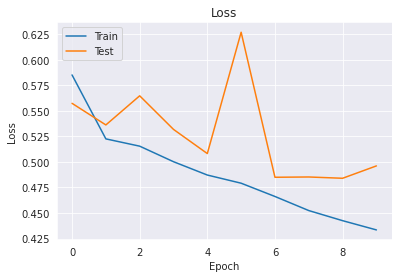

In [ ]:
model = Sequential()
model.add(Dense(24, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(inputs, labels, validation_split=0.33,epochs=10, batch_size=10, verbose=0)

# Plot the training loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Goal-3**
Identified those selective features which are comming under risk conditions

# **Feature engineering**

Feature Engineering is the way of extracting features from data and transforming them into formats that are suitable for Machine Learning algorithms. ... Scaling, discretization, binning and filling missing data values are the most common forms of data transformation.

In [ ]:
new_data.loc[(new_data["BMI"] < 18.5), "NEW_BMI_CAT"] = "Underweight"
new_data.loc[(new_data["BMI"] > 18.5) & (new_data["BMI"] < 25), "NEW_BMI_CAT"] = "Normal"
new_data.loc[(new_data["BMI"] > 25) & (new_data["BMI"] < 30), "NEW_BMI_CAT"] = "Overweight"
new_data.loc[(new_data["BMI"] > 30) & (new_data["BMI"] < 40), "NEW_BMI_CAT"] = "Obese"

new_data.loc[(new_data["Glucose"] < 70), "NEW_GLUCOSE_CAT"] = "Low"
new_data.loc[(new_data["Glucose"] > 70) & (new_data["Glucose"] < 99), "NEW_GLUCOSE_CAT"] = "Normal"
new_data.loc[(new_data["Glucose"] > 99) & (new_data["Glucose"] < 126), "NEW_GLUCOSE_CAT"] = "NP"
new_data.loc[(new_data["Glucose"] > 126) & (new_data["Glucose"] < 200), "NEW_GLUCOSE_CAT"] = "High"

new_data.loc[new_data['SkinThickness'] < 30, "NEW_SKIN_THICKNESS"] = "Normal"
new_data.loc[new_data['SkinThickness'] >= 30, "NEW_SKIN_THICKNESS"] = "HighFat"

new_data.loc[new_data['Pregnancies'] == 0, "NEW_PREGNANCIES"] = "NoPregnancy"
new_data.loc[((new_data['Pregnancies'] > 0) & (new_data['Pregnancies'] <= 4)), "NEW_PREGNANCIES"] = "NormalPregnancy"
new_data.loc[(new_data['Pregnancies'] > 4), "NEW_PREGNANCIES"] = "OverPregnancy"

new_data.loc[(new_data['SkinThickness'] < 30) & (new_data['BloodPressure'] < 80), "NEW_CIRCULATION_LEVEL"] = "Normal"
new_data.loc[(new_data['SkinThickness'] >= 30) & (new_data['BloodPressure'] >= 80), "NEW_CIRCULATION_LEVEL"] = "CircularAtHighRisk"
new_data.loc[((new_data['SkinThickness'] < 30) & (new_data['BloodPressure'] >= 80))
       | ((new_data['SkinThickness'] >= 30) & (new_data['BloodPressure'] < 80)), "NEW_CIRCULATION_LEVEL"] = "CircularAtMediumRisk"

new_data["Pre_Age_Cat"] = new_data["Age"] * new_data["Pregnancies"]

new_data["Ins_Glu_Cat"] = new_data["Glucose"] * new_data["Insulin"]

In [ ]:
##converting labels in numeric form to machine readable form
def label_encoder(dataframe, binary_col):
    labelencoder = preprocessing.LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


In [ ]:
binary_cols = [col for col in new_data.columns if new_data[col].dtypes == "O"
               and len(new_data[col].unique()) == 2]

 **one hot encoding**
 
 One hot encoding can be defined as the essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model.

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [ ]:
ohe_cols = [col for col in new_data.columns if 10 >= len(new_data[col].unique()) > 2]

In [ ]:
one_hot_encoder(new_data, ohe_cols, drop_first=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_SKIN_THICKNESS,NEW_PREGNANCIES,Pre_Age_Cat,Ins_Glu_Cat,NEW_BMI_CAT_Obese,NEW_BMI_CAT_Overweight,NEW_BMI_CAT_Underweight,NEW_GLUCOSE_CAT_Low,NEW_GLUCOSE_CAT_NP,NEW_GLUCOSE_CAT_Normal,NEW_CIRCULATION_LEVEL_CircularAtMediumRisk,NEW_CIRCULATION_LEVEL_Normal
0,8,92,93,47,36,21.240576,0.158365,23,0,HighFat,OverPregnancy,184,3312,0,0,0,0,0,1,0,0
1,7,115,47,52,35,41.511523,0.079019,23,0,HighFat,OverPregnancy,161,4025,0,0,0,0,1,0,1,0
2,9,103,78,25,304,29.582192,1.282870,43,1,Normal,OverPregnancy,387,31312,0,1,0,0,1,0,0,1
3,1,85,59,27,35,42.604536,0.549542,22,0,Normal,NormalPregnancy,22,2975,0,0,0,0,0,1,0,1
4,8,80,95,33,24,26.624929,0.443947,53,1,HighFat,OverPregnancy,424,1920,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10954,1,121,78,39,74,39.000000,0.261000,28,0,HighFat,NormalPregnancy,28,8954,1,0,0,0,1,0,1,0
10955,1,128,88,39,110,36.500000,1.057000,37,1,HighFat,NormalPregnancy,37,14080,1,0,0,0,0,0,0,0
10956,2,88,58,26,16,28.400000,0.766000,22,0,Normal,NormalPregnancy,44,1408,0,1,0,0,0,1,0,1
10957,10,101,76,48,180,32.900000,0.171000,63,0,HighFat,OverPregnancy,630,18180,1,0,0,0,1,0,1,0


In [ ]:
data_new1 = new_data[['NEW_SKIN_THICKNESS']]
data_new2 = new_data[['NEW_CIRCULATION_LEVEL']]
data_new3 = new_data[['NEW_PREGNANCIES']]

In [ ]:
data_new1.count()
data_new1.count()
data_new1.count()

NEW_SKIN_THICKNESS    10959
dtype: int64

In [ ]:
data_new = new_data[['NEW_SKIN_THICKNESS','NEW_CIRCULATION_LEVEL','NEW_PREGNANCIES']]

In [ ]:
##Create a new table
data_new.to_sql("data_new", conn, if_exists="replace", index=False)

In [ ]:
data.loc[:,'N1']=0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'N1']=1

In [ ]:
filter_data = pd.read_sql_query('select * from data_new where NEW_SKIN_THICKNESS = "HighFat" AND NEW_CIRCULATION_LEVEL = "CircularAtMediumRisk" AND NEW_PREGNANCIES ="OverPregnancy"',conn)

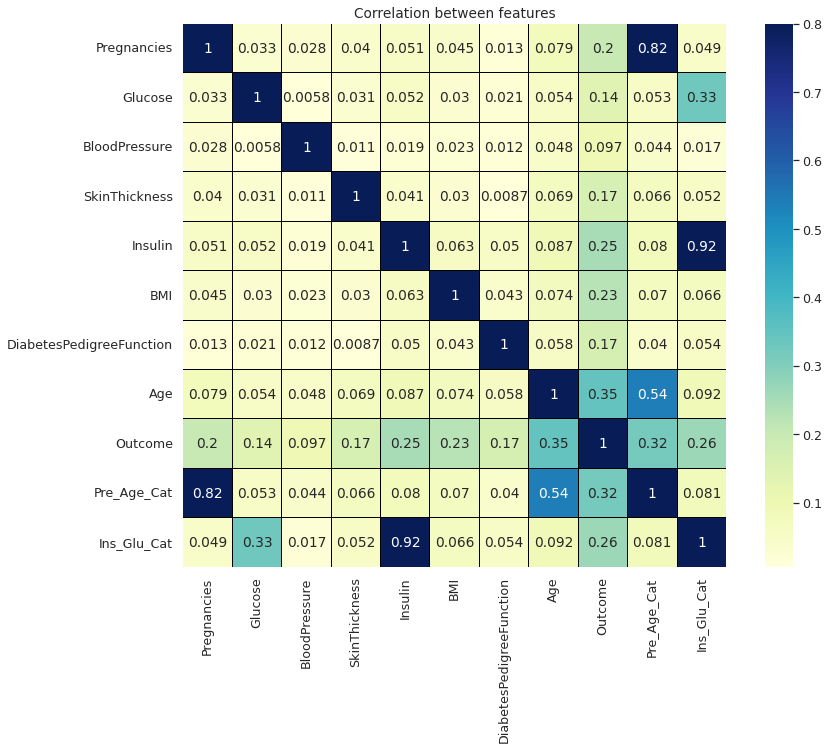

In [ ]:

corr=new_data.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

In [ ]:
filter_data1 = pd.read_sql_query('select * from data_new where NEW_SKIN_THICKNESS = "HighFat"',conn)
filter_data2 = pd.read_sql_query('select * from data_new where NEW_CIRCULATION_LEVEL = "CircularAtMediumRisk"',conn)
filter_data3 = pd.read_sql_query('select * from data_new where NEW_PREGNANCIES ="OverPregnancy"',conn)

In [ ]:
filter_data1.count()
filter_data2.count()
filter_data3.count()

NEW_SKIN_THICKNESS       5033
NEW_CIRCULATION_LEVEL    5033
NEW_PREGNANCIES          5033
dtype: int64

In [ ]:
filter_data

,NEW_SKIN_THICKNESS,NEW_CIRCULATION_LEVEL,NEW_PREGNANCIES
0,HighFat,CircularAtMediumRisk,OverPregnancy
1,HighFat,CircularAtMediumRisk,OverPregnancy
2,HighFat,CircularAtMediumRisk,OverPregnancy
3,HighFat,CircularAtMediumRisk,OverPregnancy
4,HighFat,CircularAtMediumRisk,OverPregnancy
...,...,...,...
1603,HighFat,CircularAtMediumRisk,OverPregnancy
1604,HighFat,CircularAtMediumRisk,OverPregnancy
1605,HighFat,CircularAtMediumRisk,OverPregnancy
1606,HighFat,CircularAtMediumRisk,OverPregnancy


In [ ]:
filter_data.count()

NEW_SKIN_THICKNESS       1608
NEW_CIRCULATION_LEVEL    1608
NEW_PREGNANCIES          1608
dtype: int64

In [ ]:
##train and split data for analysis
y = data["Outcome"]
X = data.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [ ]:
##importing cartesian model
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

In [ ]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": [2, 3, 4]}

cart_cv = GridSearchCV(cart_model, cart_params, cv=10, n_jobs=-1, verbose=True)
cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': [2, 3, 4]},
             verbose=True)

In [ ]:
cart_cv.best_params_

{'max_depth': 8, 'min_samples_split': 3}

In [ ]:
cart_tuned = DecisionTreeClassifier(**cart_cv.best_params_).fit(X_train, y_train)

In [ ]:
# test error
y_pred = cart_tuned.predict(X_test)
y_prob = cart_tuned.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3169
           1       0.86      0.86      0.86      1562

    accuracy                           0.91      4731
   macro avg       0.90      0.90      0.90      4731
weighted avg       0.91      0.91      0.91      4731



0.9437564166951854

# **END**